In [1]:
import pandas as pd

In [123]:
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])

# parse_dates=["datetime"]을 사용하여 파싱해서 데이터를 사용할 수 있다.
# train["datetime"].dt.year
# train["datetime"].dt.month
# train["datetime"].dt.day

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [124]:
test = pd.read_csv("data/test.csv", parse_dates=["datetime"])

# shape를 찍으면 가로세로 로우 수가 나오기 때문에 어떤 데이터를 로드하고 있는지 알 수 있음
# 그래서 shape를 찍는 것을 권장한다.
# train데이터와 test데이터의 차이 우리가 맞추는 것은 자전거 대여량을 예측해야함
# 캐주얼/레지스터는 비회원/회원의 대여량임 
# 카운트에 대한 데이터는 사용하기 어려운데 어떻게 사용할지 고민을 해보는 게 좋음

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [125]:
# 풍속의 0값에 특정 값을 넣어준다.

train.loc[train["windspeed"] == 0, "windspeed"] = train["windspeed"].mean()
test.loc[train["windspeed"] == 0, "windspeed"] = train["windspeed"].mean()

In [172]:
# 시간 인코딩
train["hour"] = train["datetime"].dt.hour
test["hour"] = test["datetime"].dt.hour

print(train["hour"].unique())

# 대여량이 적은 시간은 1로 셋팅했지만 점수가 더 낮아짐 전체시간을 그대로 쓰거나 인코딩 하는 게 더 유리
train["hour0"] = (train["datetime"].dt.hour >= 0) | (train["datetime"].dt.hour < 6) == 1
test["hour0"] = (test["datetime"].dt.hour >= 0) | (test["datetime"].dt.hour < 6) == 1

# 0시부터 24시까지 인코딩 한다.
# 인코딩을 했더니 점수가 더 낮아진다.
# * 시간 인코딩 시 Score= -36.41318
# * 시간을 인코딩 제거 시 Score= -36.29482 => 시간 인코딩은 불필요함
# * 하지만 대여율이 낮은 새벽시간을 추가해 주니 좀 더 0에 근접 함 Score= -36.27641

# for i in range(0,24):
#     str_hour = "hour" + str(i)
#     train[str_hour] = train["hour"] == i
#     test[str_hour] = test["hour"] == i
# #     print (str_hour)
# train[["hour0", "hour6", "hour7", "hour8", "hour9", "hour10",
#        "hour11", "hour12", "hour13", "hour14", "hour15", 
#        "hour16", "hour17", "hour18", "hour19", "hour20", "hour21", "hour22", "hour23"]].head()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [173]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month

test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month

print(train["year"].unique())

[2011 2012]


In [174]:
# 온도, 습도, 풍속
print(train["temp"].min())
print(train["temp"].mean())
print(train["temp"].max())
print("-----")
print(train["humidity"].min())
print(train["humidity"].mean())
print(train["humidity"].max())
print("-----")
print(train["windspeed"].min())
print(train["windspeed"].mean())
print(train["windspeed"].max())
print("-----")
print(train["weather"].min())
print(train["weather"].mean())
print(train["weather"].max())


train["temp_Bad"] = (train["temp"] < 10) | (train["temp"] >= 32)
train["temp_Good"] = (train["temp"] >= 10) & (train["temp"] < 32 )

train["humidity_Bad"] = (train["humidity"] < 30) | (train["humidity"] > 80)
train["humidity_Good"] = (train["humidity"] >= 30) & (train["humidity"] <= 80 )


train["windspeed_Low"] = train["windspeed"] < 30
train["windspeed_High"] = train["windspeed"] >= 30

0.82
20.23085982
41.0
-----
0
61.886459673
100
-----
6.0032
14.3431769768
56.9969
-----
1
1.41842733787
4


In [175]:
test["temp_Bad"] = (test["temp"] < 10) | (test["temp"] >= 32)
test["temp_Good"] = (test["temp"] >= 10) & (test["temp"] < 32 )

# 습도는 30이하이거나 80이상이면 Bad로 그 안의 범위이면 Good으로 두 가지로 나눔
test["humidity_Bad"] = (test["humidity"] < 30) | (test["humidity"] > 80)
test["humidity_Good"] = (test["humidity"] >= 30) & (test["humidity"] <= 80 )

# 풍속의 평균은 14.343
test["windspeed_Low"] = test["windspeed"] < 30
test["windspeed_High"] = test["windspeed"] >= 30

In [199]:
# train 인코딩

train["weekday"] = train["datetime"].dt.weekday

print( train["weekday"].unique())
print( train["season"].unique())
print( train["weather"].unique())

for i in range(0, 7):
    weekday_col_name = "weekday" + str(i)
    train[weekday_col_name] = train["datetime"].dt.weekday == i
    test[weekday_col_name] = test["datetime"].dt.weekday == i
    if ( i < 5 ) | ( i > 0) :
        season_col_name = "season" + str(i)
        weather_col_name = "weather" + str(i)
        train[season_col_name] = train["season"] == i
        train[weather_col_name] = train["weather"] == i
        test[season_col_name] = test["season"] == i
        test[weather_col_name] = test["weather"] == i
    
print(train.shape)
print(test.shape)
train[["weather1", "weather2", "weather3", "weather4", "season1", "season2", "season3", "season4","weekday0", "weekday1","weekday2","weekday3","weekday4","weekday5","weekday6"]].tail()

[5 6 0 1 2 3 4]
[1 2 3 4]
[1 2 3 4]
(10886, 67)
(6493, 63)


,weather1,weather2,weather3,weather4,season1,season2,season3,season4,weekday0,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6
10881,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False
10882,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False
10883,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False
10884,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False
10885,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False


# train

In [221]:
# feature_names = ["year", "month", "weekday", "hour", "season", "holiday", "workingday", "weather", "temp", "atemp", "humidity", "windspeed"]
# feature_names = ["year", "weekday0", "weekday1","weekday2","weekday3","weekday4","weekday5","weekday6", 
#                  "holiday", "workingday",
#                  "hour0", "hour6", "hour7", "hour8", "hour9", "hour10", 
#                  "hour11", "hour12", "hour13", "hour14", "hour15", 
#                  "hour16", "hour17", "hour18", "hour19", "hour20", "hour21", "hour22", "hour23", 
#                  "weather1", "weather2", "weather3", "weather4", "season1", "season2", "season3", "season4", 
#                  "temp_Good", "temp_Bad", "humidity_Bad", "humidity_Good", "windspeed_Low", "windspeed_High"]
feature_names = ["year", "month", "hour", "hour0",
                 "season1", "season2", "season3", "season4", "holiday", "workingday",
                 "weather1", "weather2", "weather3", "weather4", 
                 "weekday0", "weekday1","weekday2","weekday3","weekday4","weekday5","weekday6",  
                 "temp_Good", "temp_Bad", "humidity_Bad", "humidity_Good", "windspeed_Low", "windspeed_High"]
feature_names

['year',
 'month',
 'hour',
 'hour0',
 'season1',
 'season2',
 'season3',
 'season4',
 'holiday',
 'workingday',
 'weather1',
 'weather2',
 'weather3',
 'weather4',
 'weekday0',
 'weekday1',
 'weekday2',
 'weekday3',
 'weekday4',
 'weekday5',
 'weekday6',
 'temp_Good',
 'temp_Bad',
 'humidity_Bad',
 'humidity_Good',
 'windspeed_Low',
 'windspeed_High']

In [222]:
# X_train
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 27)


,year,month,hour,hour0,season1,season2,season3,season4,holiday,workingday,...,weekday3,weekday4,weekday5,weekday6,temp_Good,temp_Bad,humidity_Bad,humidity_Good,windspeed_Low,windspeed_High
0,2011,1,0,True,True,False,False,False,0,0,...,False,False,True,False,False,True,True,False,True,False
1,2011,1,1,True,True,False,False,False,0,0,...,False,False,True,False,False,True,False,True,True,False
2,2011,1,2,True,True,False,False,False,0,0,...,False,False,True,False,False,True,False,True,True,False
3,2011,1,3,True,True,False,False,False,0,0,...,False,False,True,False,False,True,False,True,True,False
4,2011,1,4,True,True,False,False,False,0,0,...,False,False,True,False,False,True,False,True,True,False


In [223]:
# X_test
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 27)


,year,month,hour,hour0,season1,season2,season3,season4,holiday,workingday,...,weekday3,weekday4,weekday5,weekday6,temp_Good,temp_Bad,humidity_Bad,humidity_Good,windspeed_Low,windspeed_High
0,2011,1,0,True,True,False,False,False,0,1,...,True,False,False,False,True,False,False,True,True,False
1,2011,1,1,True,True,False,False,False,0,1,...,True,False,False,False,True,False,False,True,True,False
2,2011,1,2,True,True,False,False,False,0,1,...,True,False,False,False,True,False,False,True,True,False
3,2011,1,3,True,True,False,False,False,0,1,...,True,False,False,False,True,False,False,True,True,False
4,2011,1,4,True,True,False,False,False,0,1,...,True,False,False,False,True,False,False,True,True,False


In [224]:
# 벡터는 소문자를 사용한다.
label_name = "count"

y_train = train[label_name] 

print(y_train.shape)
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [225]:
# DecisionTreeRegressor를 사용하는 문제
# 샘플링 할때 랜덤으로 샘플링하기 때문에 결과가 다르게 나타난다.
# 실습해서 개선시켜야 하는데 랜덤이 잘 나온건지 컬럼을 변경해서 잘 나온건지 구분해야 하기 때문에 랜덤을 고정시켜주어야 한다.
# RandomForestRegressor(random_state=37)
# 같은 시드 넘버를 고정해서 실행하면 어느 PC에서 실행하든 같은 결과가 나온다.
# 캐글 경진대회 1등이 lucky number를 포스트모템에서 공유하기도 한다.

# n_jobs 코어에 대한 옵션을 주어 사용가능한 모든 코어를 사용하게 하는 것 
# from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# model = DecisionTreeRegressor()
model = RandomForestRegressor(random_state=37, n_jobs=-1)

model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [226]:
# Score

In [227]:
from sklearn.cross_validation import cross_val_score

score = cross_val_score(model, X_train, y_train, cv=20, scoring="neg_mean_absolute_error").mean()

# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

Score= -36.27641


* 시간 인코딩 시 Score= -36.41318
* 시간을 인코딩 제거 시 Score= -36.29482 => 시간 인코딩은 불필요함
* 하지만 대여율이 낮은 새벽시간을 추가해 주니 좀 더 0에 근접 함 Score= -36.27641 이때 캐글 스코어 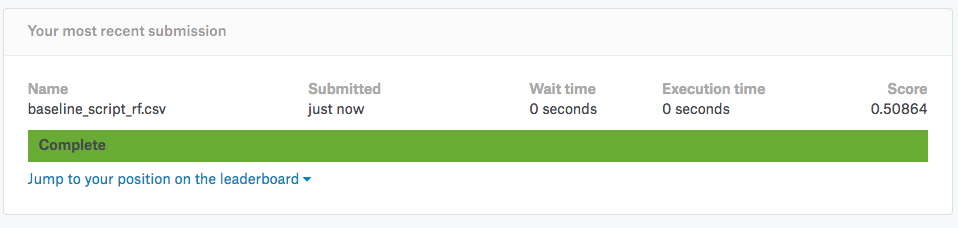


### 마이너스 데이터가 나오는 이유는 강사의 파이콘 강연을 참고할 것

[실패한 오픈소스 공헌으로 배워가기](https://www.slideshare.net/sungheeekang/ss-78744477/1)


MAE와 MSE는 결과값이 음수로 나온다. 하지만 파이콘 강연에서 발표자의 구현은 RMSE는 결과값에 루트를 씌워 양수로 나오기 때문에 값이 맞지 않는다.
Spark에서도 비슷한 고민의 흔적이 있다.

인공지능에서 찾을 수 없는 값을 Hyperparameter라고 한다. 지금의 경우 learning_rate를 Hyperparameter라 할 수 있다.
가장 쉬운 방법은, 좋은 Hyperparameter라고 생각할 수 있는 후보들을 전부 다 테스트 하는 것이다.
이를 Grid Search라고 하며, Scikit-Learn에는 GridCV라는 클래스가 구현되어 있다.
우리가 사용하는 Scoring Metric에 따라 가장 작은 값에 해당하는 Hyperparameter를 선택할지, 가장 큰 값에 해당하는 Hyperparameter를 선택할지 달라진다.

In [228]:
# 학습시킴, 피팅(옷을 맞출 때 사용하는 피팅을 생각함) - 피처와 레이블을 넣어주면 알아서 학습을 함
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [229]:
# 예측
# shape를 찍어서 row 수를 보고 train 데이터인지 test데이터인지를 판별
predictions = model.predict(X_test)

print(predictions.shape)
predictions[0:10]

(6493,)


array([  14.        ,    5.5       ,    7.6       ,    3.55      ,
          3.4       ,    3.1       ,   31.5       ,   74.1       ,
        199.08333333,  118.5       ])

In [230]:
# Shubmit

In [232]:
submission = pd.read_csv("data/sampleSubmission.csv")
submission

submission["count"] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,14.00
1,2011-01-20 01:00:00,5.50
2,2011-01-20 02:00:00,7.60
3,2011-01-20 03:00:00,3.55
4,2011-01-20 04:00:00,3.40


In [234]:
# 타이타닉 문제와 다르게 인덱스로 잡을 만한 컬럼이 없음
# 그런데 맨 앞에 index가 있으면 캐글에서 오류가 나기 때문에 index를 없애고 데이터를 추출한다.
submission.to_csv("data/baseline_script_rf.csv", index=False)